<a href="https://colab.research.google.com/github/11-Kani/Hotel_Booking_Analysis__Project_1-/blob/main/Final_Hotel_Booking_Analysis__Kanika_Kakra_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [106]:
#Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

In [107]:
#Mount the Drive such that we can get access to data file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
#Reading the data from a CSV(Comma Separated File)
Hotel_booking_df = pd.read_csv('/content/drive/MyDrive/Kanika Kakra_Capstone_EDA_ Project_On_HotelBookingAnalysis/Hotel Bookings.csv')

In [109]:
#First glimpse of data file Hotel Bookings.csv
Hotel_booking_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [110]:
#Lets extract first 10 rows of data file
Hotel_booking_df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [111]:
#Extracting last 10 rows of data file
Hotel_booking_df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [112]:
#Now lets get the details each column like null/non null values,datatypes
Hotel_booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [113]:
#Creating a copy of original data with the required columns and it helps in maintaining the original dataframe.
Hotel_df = Hotel_booking_df.copy()

# Renaming the 'adr' column name to 'Average_daily_rate' for understanding the data well.

In [114]:
Hotel_df.rename(columns ={'adr' : 'Average_daily_rate'},inplace =True)  

In [115]:
#Lets see the alteration in col name
Hotel_df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,Average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [116]:
#Computing the summary of statistics pertaining to the data frame columns having numeric values
Hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,Average_daily_rate,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [117]:
Hotel_df.isna().sum().sort_values(ascending =False)[:6]

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
assigned_room_type         0
dtype: int64

# We observed there are null values in columns(agent, children,company,country). We are replacing null values with zero for columns(agent,company) and replacing null values with 'OTHER' for country column. The null values in children we are replacing with its  mean value.

In [118]:
#Replacing null values
Hotel_df['children'].fillna(Hotel_df.children.mean(), inplace = True) #replacing the NaN values for children col by its mean value
Hotel_df['children'] = Hotel_df['children'].astype(int)    #converting the data type of children column to int
Hotel_df['company'].fillna(0 , inplace = True)              # filling null values with 0 for company column
Hotel_df['company'].astype(int)                            #converting the data type of company column to int
Hotel_df['agent'].fillna(0 , inplace = True)
Hotel_df['agent'].astype(int)                               #converting the data type of agent column to int
Hotel_df['country'].fillna('Other',inplace = True)

# Removing duplicate rows

In [119]:
Hotel_df[Hotel_df.duplicated()].shape 

(31994, 32)

In [120]:
#To make changes permanent in data file
Hotel_df.drop_duplicates(inplace = True)

We eliminated the null values and duplicated  rows too.

In [121]:
Hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  int64  
 11  babies                          87396 non-null  int64  
 12  meal                           

We observed that colums like Adults,Babies,Children corrospondingly has value as 0.So lets eliminate them

In [122]:
#We get the number of rows 
Hotel_df [Hotel_df.adults + Hotel_df.children + Hotel_df.babies == 0].shape

(166, 32)

In [123]:
#Removing the rows where total was 0
Hotel_df.drop(Hotel_df[Hotel_df.adults + Hotel_df.babies + Hotel_df.children == 0].index, inplace = True) 

# Adding new columns to data sheet

In [124]:
Hotel_df['Total_members'] = Hotel_df.adults + Hotel_df.children + Hotel_df.babies  #creating new column
Hotel_df.loc[Hotel_df.Total_members > 20, 'Total_members'] = 20  #Removing outliers     
Hotel_df['Full_stay'] = Hotel_df.stays_in_weekend_nights + Hotel_df.stays_in_week_nights #creating new column
Hotel_df['kids'] = Hotel_df.children + Hotel_df.babies        #creating new column


In [125]:
Hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87230 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  object 
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_year               87230 non-null  int64  
 4   arrival_date_month              87230 non-null  object 
 5   arrival_date_week_number        87230 non-null  int64  
 6   arrival_date_day_of_month       87230 non-null  int64  
 7   stays_in_weekend_nights         87230 non-null  int64  
 8   stays_in_week_nights            87230 non-null  int64  
 9   adults                          87230 non-null  int64  
 10  children                        87230 non-null  int64  
 11  babies                          87230 non-null  int64  
 12  meal                           

Eliminating the outliers


1.Removing an outlier from Average_daily_rate column

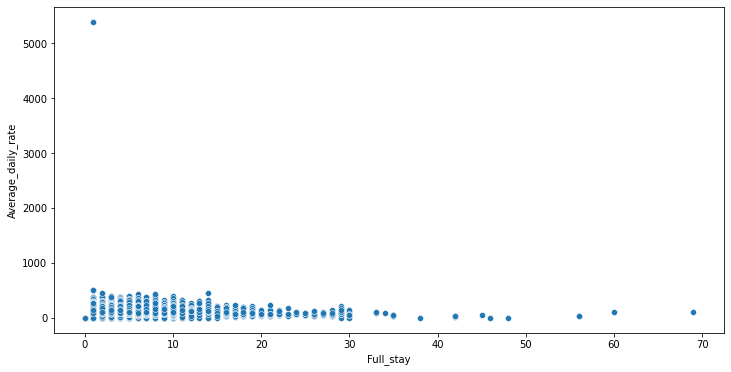

In [126]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'Average_daily_rate', x = 'Full_stay', data = Hotel_df)
plt.show()

In [127]:
Hotel_df.drop(Hotel_df[Hotel_df['Average_daily_rate'] > 5000].index, inplace = True) # Removing all values > 5000 

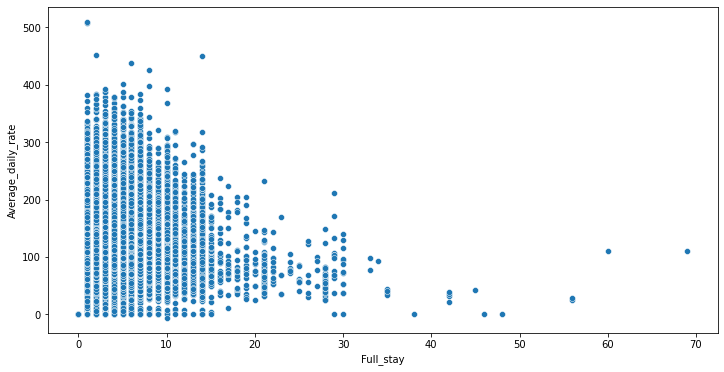

In [128]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'Average_daily_rate', x = 'Full_stay', data = Hotel_df)
plt.show()

From the scatter plot we can see that as length of Full_stay increases the Average_daily_rate decreases. This means for longer stay, the better deal for customer can be finalised.

2.Removing outliers from 'stays_in weekend_nights' and 'stays_in_week_nights

In [129]:
Hotel_df.loc[Hotel_df.stays_in_weekend_nights >= 5,'stays_in_weekend_nights']=  5  #greater than 5 stays are assigned to 5 stays
Hotel_df.loc[Hotel_df.stays_in_week_nights >= 10,'stays_in_week_nights']= 10  #greater than 5 stays are assigned to 5 stays

# Creating subset dataframes for 'City' and 'Resort' hotel data

In [130]:
City_df =pd.DataFrame(Hotel_df[Hotel_df['hotel'] =='City Hotel'])
Resort_df =pd.DataFrame(Hotel_df[Hotel_df['hotel'] =='Resort Hotel'])

In [131]:
City_df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,Average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_members,Full_stay,kids
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,0,Transient,0.0,0,0,Check-Out,2015-07-03,1,2,0
40061,City Hotel,1,88,2015,July,27,1,0,4,2,...,0,Transient,76.5,0,1,Canceled,2015-07-01,2,4,0


In [132]:
Resort_df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,Average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_members,Full_stay,kids
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0,0


Lets first find the correlation between the numerical data.

In [133]:
Corr_df = Hotel_df[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','Average_daily_rate','required_car_parking_spaces','total_of_special_requests','Full_stay','Total_members']]

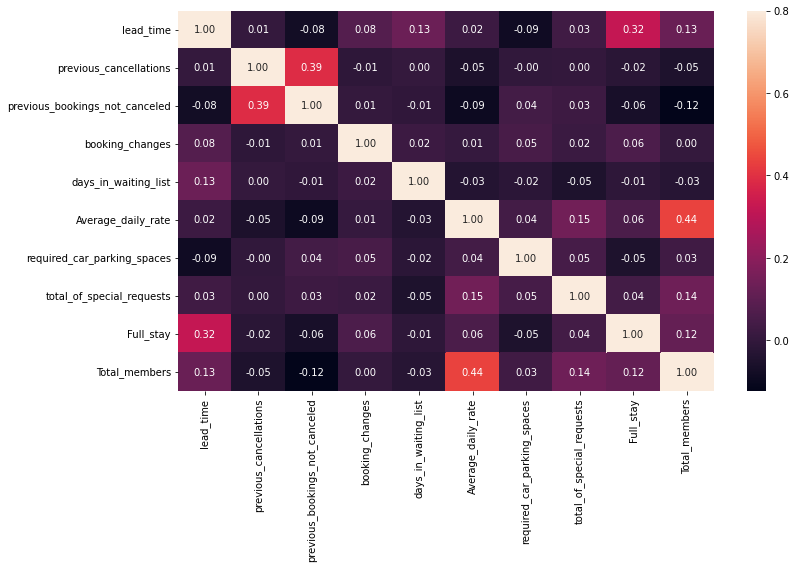

In [134]:
corr_mat = Corr_df.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corr_mat,vmax=0.8,annot = True,fmt='.2f');

We observed
1-->Full_stay length and lead time have slight correlation. This may means that for longer hotel stays people generally plan little before the the actual arrival.

2--> Average_daily_rate is slightly correlated with Total_members, which makes sense as more no. of people means more revenue, therefore more Average_daily_rate.



# Hotel type Percentage

In [135]:
Hotel_typ =Hotel_df['hotel'].value_counts()  #Counting the number of hotels[city/resort]
Hotel_typ

City Hotel      53273
Resort Hotel    33956
Name: hotel, dtype: int64

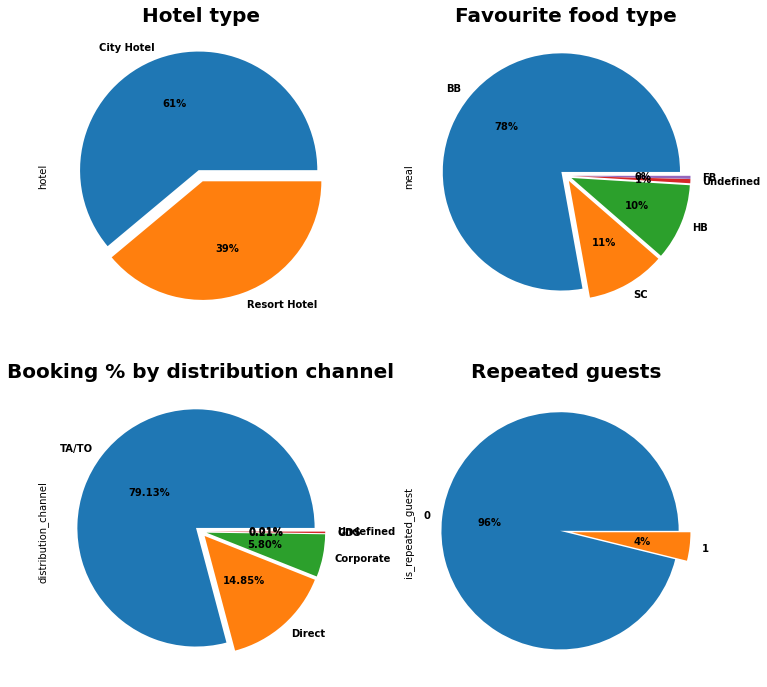

In [136]:
plt.subplot(2,2,1 )
Hotel_type_ratio = Hotel_typ.plot.pie(x='City Hotel', y ='Resort Hotel',autopct='%1.0f%%',textprops={'weight': 'bold'},figsize =(12,12),explode =[0.05]*2) 
plt.title('Hotel type',fontweight="bold", size=20)
#--------------------------------------------------------------------------------------------------#
plt.subplot(2,2,2 )
meal_typ =Hotel_df['meal'].value_counts()
Food_type_ratio = meal_typ.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'},explode = [0.05]*5)           #plotting the values using pie chart    
plt.title('Favourite food type',fontweight="bold", size=20)                                                     #Adding the title to chart
                       
#--------------------------------------------------------------------------------------------------# 
plt.subplot(2,2,3 )
booking_distibution_typ =Hotel_df['distribution_channel'].value_counts()
# plt.pie(x=Hotel_df, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
booking_distributuion_type_ratio =booking_distibution_typ.plot.pie(autopct='%.2f%%',textprops={'weight': 'bold'}, pctdistance=0.5,explode = [0.05]*5)    #plotting the values using pie chart 
plt.title('Booking % by distribution channel', fontweight ='bold', size =20);                                                                             #Adding the title to chart
#--------------------------------------------------------------------------------------------------#
plt.subplot(2,2,4)
Repeated = Hotel_df.is_repeated_guest .value_counts()                                       #Counting the number of guests repeated
Repeated.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'},explode = [0.05]*2)       #plotting the values using pie chart
plt.title('Repeated guests', fontweight ='bold', size =20);                                #Adding title to the chart
#--------------------------------------------------------------------------------------------------#

We observed 
1.City Hotel shares 61% out of 100 than Resort Hotel.

2.BB stands for Bed and Breakfast. HB stands for Half Board (in which breakfast and dinner are included.) FB stands for Full Board (in which breakfast, lunch and dinner are included.)
We observed 78% of people prefer 'BB' type meal.

3.We observed 81.98% of share is occupied by TA/TO.

4.Only 4% of guests are repeated.

# Customer type and percentage of car parking utilised

In [137]:
Hotel_df.Total_members.sum()       #calculating the sum of total members

176868

In [138]:
Hotel_df.required_car_parking_spaces.sum()     #calculating the sum of required_car_parking_space

7354

Text(0.5, 1.0, 'required_parking_spaces')

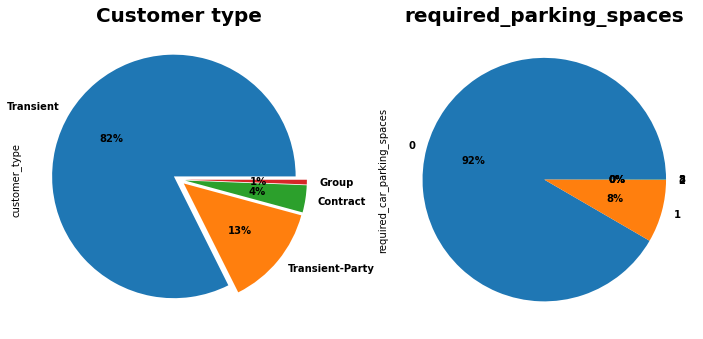

In [139]:
Hotel_df.customer_type.nunique()
Customer_typ =Hotel_df.customer_type .value_counts()
plt.figure(figsize =(12,12))
plt.subplot(1,2,1 )
Customer_typ.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'},explode =[0.05]*4)       #plotting the values using pie chart
plt.title('Customer type',fontweight="bold", size=20)                                         #Adding the title to chart
#---------------------------------------------------------------------------------------------------#
plt.subplot(1,2,2)
Car_parking_spaces = Hotel_df.required_car_parking_spaces.value_counts()
Car_parking_spaces.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'})            #plotting the values using pie chart
plt.title('required_parking_spaces',fontweight="bold", size=20)                        #Adding the title to chart

We observed:-
1-->There are 4 types of Customer. Out of them most are 'Transient Type"

2-->only 8% people require parking spaces


# Hotel Wise Bookings based on Month and Year

In [140]:
City_df.arrival_date_month.value_counts()  #counting the arrival of guests in city hotel for every month 

August       6576
July         5730
May          5402
April        5072
June         4997
March        4832
September    4232
October      4197
February     3591
December     2998
November     2922
January      2724
Name: arrival_date_month, dtype: int64

In [141]:
Resort_df.arrival_date_month.value_counts()   #counting the arrival of guests in resort hotel for every month 

August       4666
July         4313
May          2942
April        2828
June         2759
October      2724
March        2656
February     2492
September    2450
December     2114
November     2051
January      1961
Name: arrival_date_month, dtype: int64

Text(0.5, 1.0, ' Bookings by year')

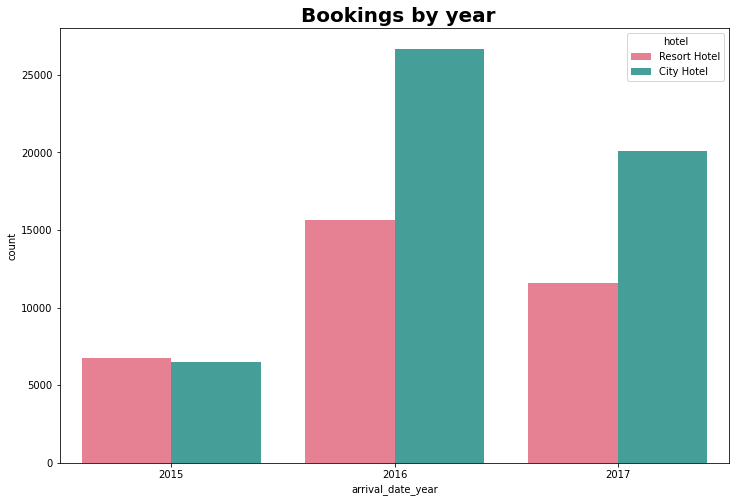

In [142]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
Hotel_df['arrival_date_month'] = pd.Categorical(Hotel_df['arrival_date_month'], categories=months, ordered=True)
plt.figure(figsize = (12,8))
sns.countplot(x= 'arrival_date_year', data= Hotel_df, hue= 'hotel', palette='husl').set_title (' Bookings by year',fontweight="bold", size=20)

1-->Bookings for City hotels are higher than Resort hotels over the years and in year 2016 the bookings for both the hotels were maximum. 
2-->Most bookings were done in the month of May,June, July, August.

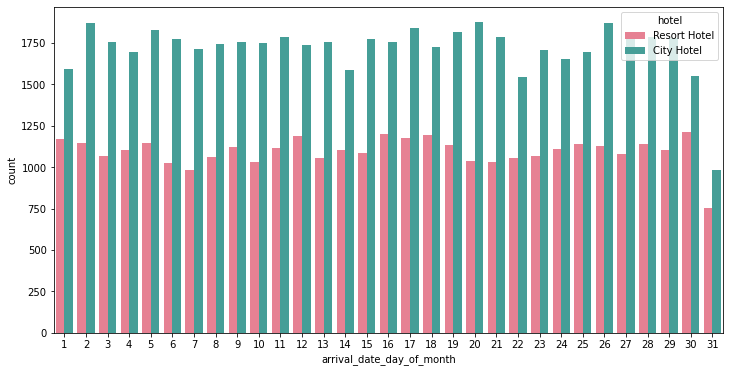

In [143]:
plt.figure(figsize=(12,6))
sns.countplot(data = Hotel_df, x = 'arrival_date_day_of_month', hue='hotel', palette='husl')
plt.show()

We observe footfall for city hotel is almost the same all the days of month.

Text(0, 0.5, 'Number of guest')

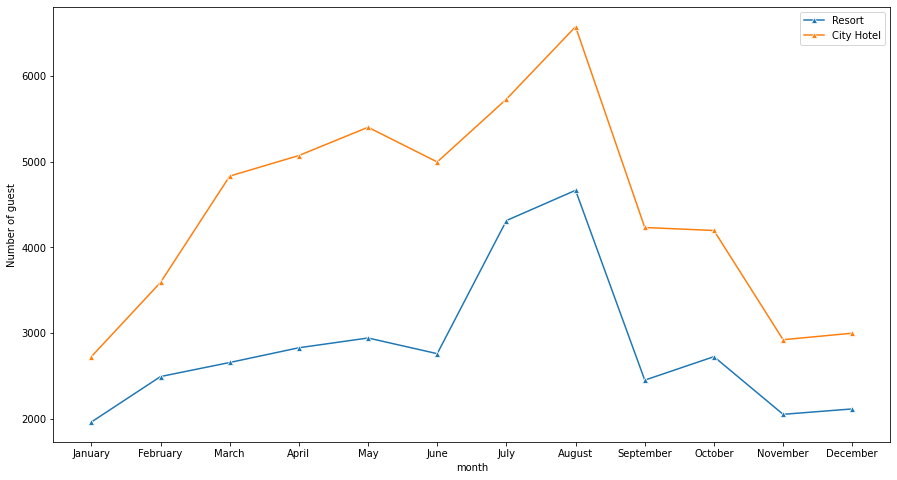

In [144]:
 resort_guest = Resort_df['arrival_date_month'].value_counts().reset_index()   #keeping a count of arrival months for resort hotel
resort_guest.columns=['month','no of guests']
#resort_guest

city_guest = City_df['arrival_date_month'].value_counts().reset_index()       #keeping a count of arrival months for city hotel
city_guest.columns=['month','no of guests']
#city_guest

final_guest=resort_guest.merge(city_guest, on = 'month')                   #merge of two data frame on condition having same month
final_guest.columns=['month','no of guests in resort','no of guest in city hotel']
final_guest
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_guest['month'] = pd.Categorical(final_guest['month'], categories=months, ordered=True)   #categorical-variables take on a fixed and limited number of possible values

#Which month get most visitors?
plt.figure(figsize =(15,8))
sns.lineplot(data=final_guest, x='month', y='no of guests in resort', marker ='^')
sns.lineplot(data=final_guest, x='month', y='no of guest in city hotel',marker ='^')
plt.legend(['Resort','City Hotel'])
plt.ylabel('Number of guest')

We observe the busiest months for both the hotels are May,june ,july,August.

# From which country guests are visiting the hotel?

Text(0.5, 1.0, 'Number of bookings country wise')

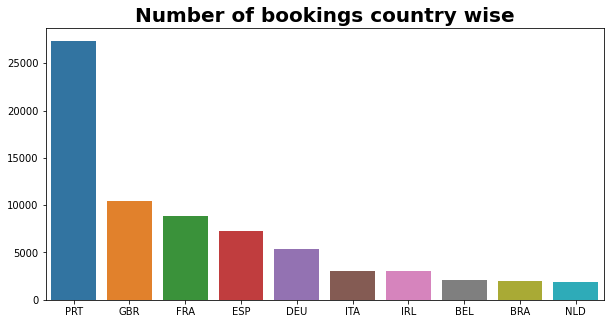

In [145]:
plt.figure(figsize = (10,5))
sns.barplot (y= list(Hotel_df.country.value_counts().head (10)), x= list(Hotel_df.country.value_counts().head(10).index)) #counting the guests arrived from every type of country
plt.title("Number of bookings country wise",fontweight="bold", size=20)      #Adding title to the plot
#list(Hotel_df.country.value_counts().head (10))-->[48590, 12129, 10415, 8568, 7287, 3766, 3375, 2342, 2224, 2104]
#list(Hotel_df.country.value_counts().head(10).index)-->['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'NLD']

We observed most  guests visited the hotels where from  Portugal and other Europian contries.

Adults and Kids

In [146]:
City_df['kids'].value_counts()  #counting the frequency of kids arrived at city hotel

0     48039
1      3128
2      2023
3        81
10        1
9         1
Name: kids, dtype: int64

In [147]:
Resort_df['kids'].value_counts() #counting the frequency of kids arrived at resort hotel

0     30087
1      2149
2      1690
3        29
10        1
Name: kids, dtype: int64

In [148]:
Hotel_df['adults'].value_counts() # counting the number of adults arrived 

2     64496
1     16503
3      5935
0       219
4        60
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


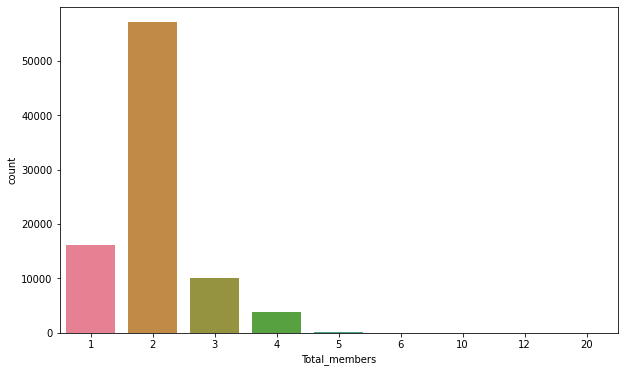

In [149]:
Hotel_df.loc[Hotel_df.Total_members > 20, 'Total_members'] = 20       #filtering the values for total_members >20
plt.figure(figsize=(10,6))
sns.countplot(Hotel_df['Total_members'], palette='husl')             #plotting the values using bar graph
plt.show()

We observe that mainly a pair of adults vists the hotel mostly than the family with children.

# Which agent made the maximum bookings?

Text(0.5, 1.0, 'No. of bookings done by agents')

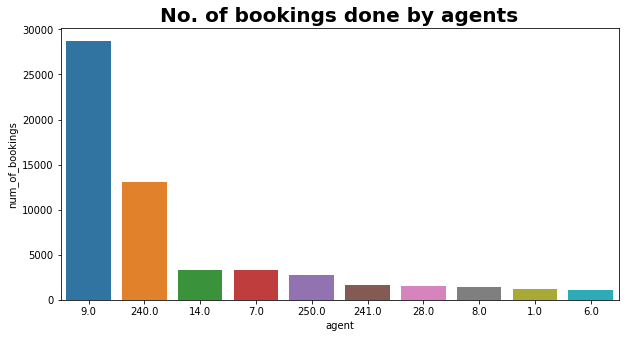

In [150]:
agent_df = pd.DataFrame(Hotel_df['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
agent_df.drop(agent_df[agent_df['agent'] == 0].index, inplace = True)       # 0 represents that booking is not made by an agent
agent_df = agent_df[:10]                                                   # Selecting top 10 performing agents
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = agent_df, order = agent_df.sort_values('num_of_bookings' ,ascending = False).agent)
plt.title( 'No. of bookings done by agents',fontweight="bold", size=20)    #Adding the title to chart

We observed Agent no. 9 has made most no. of bookings.

# Most preferred Room type

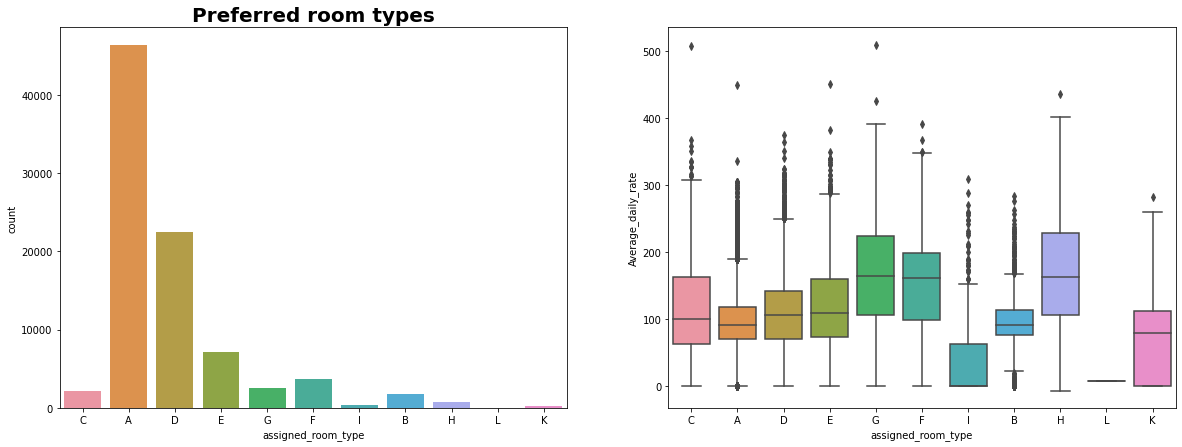

In [151]:
plt.figure(figsize = (20,7))                                   #fixing the size of figure
plt.subplot(1,2,1)
sns.countplot( x = Hotel_df['assigned_room_type'])             #plotting the value
plt.title('Preferred room types',fontweight="bold", size=20)  
plt.subplot(1,2,2)
sns.boxplot(x = Hotel_df['assigned_room_type'], y = Hotel_df['Average_daily_rate'])

We observed Room type A and D are most preferred by guests.

but better 'Average daily rate' rooms are of type H,G,F and C.

# Stay length in hotel

Text(0.5, 1.0, 'Stay length in hotels')

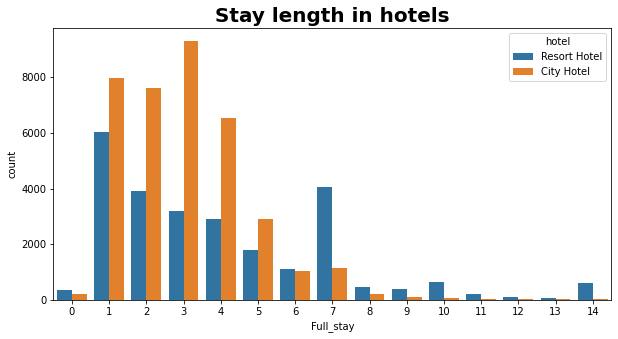

In [152]:
not_canceled = Hotel_df[Hotel_df['is_canceled'] == 0]
s1 = not_canceled[not_canceled['Full_stay'] < 15]          #keeping the limit for full stay to less than 15 days
plt.figure(figsize = (10,5))
sns.countplot(x = s1['Full_stay'], hue = s1['hotel'])    #countplot plots the count of the number of records by category
plt.title('Stay length in hotels',fontweight="bold", size=20)

We observe most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.

Stay length on weekdays and weelends

Text(0.5, 1.0, 'Number of stays on weekday nights')

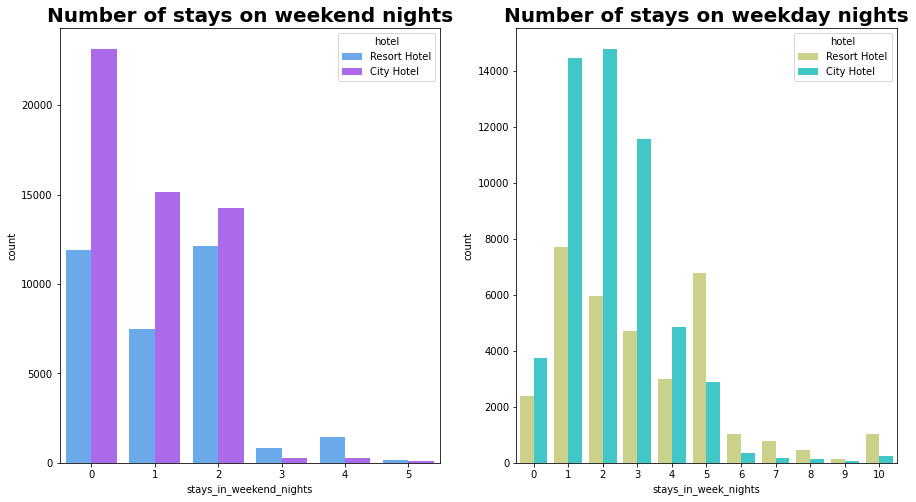

In [153]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='stays_in_weekend_nights',hue='hotel', data=Hotel_df, palette='cool')     #using countplot plots the count of the number of records by category
plt.title("Number of stays on weekend nights",fontweight="bold", size=20)                   #Adding title to the plot
plt.subplot(1, 2, 2)
sns.countplot(x='stays_in_week_nights',hue='hotel', data=Hotel_df, palette='rainbow_r')    #countplot plots the count of the number of records by category
plt.title("Number of stays on weekday nights",fontweight="bold", size=20)                  #Adding title to the plot

We observe City hotels have more number of stays irrespective of week or weekend stays.

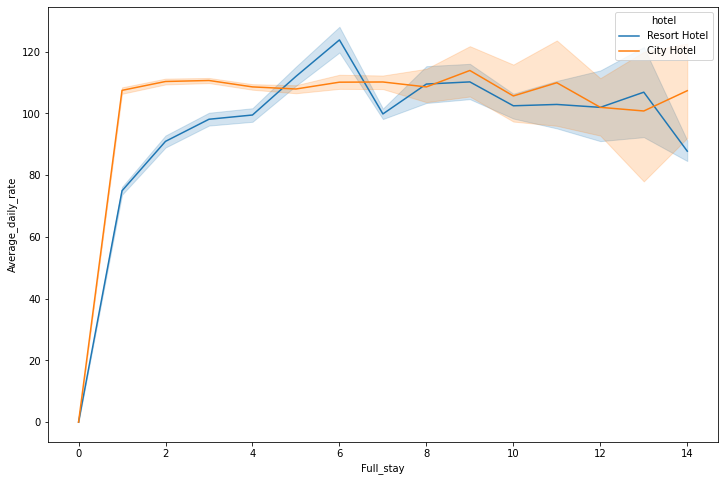

In [154]:
not_canceled = Hotel_df[Hotel_df['is_canceled'] == 0]
s1 = not_canceled[not_canceled['Full_stay'] < 15]        #taking less than 15 days of Full stay
plt.figure(figsize =(12,8))
sns.lineplot(data = Hotel_df, x = s1['Full_stay'], y = 'Average_daily_rate', hue = 'hotel')

We observe after 2 days Average_daily_rate for both the hotels is in range 100 to 130. To get min. Average_daily_rate for resort hotel guests should plan a stay of 6-7 days. For city hotels is almost constant. And Average_daily_rate drops after 14 days(long stay).

# Cancellation Rates

Text(0.5, 1.0, 'Booking preferred with deposit type')

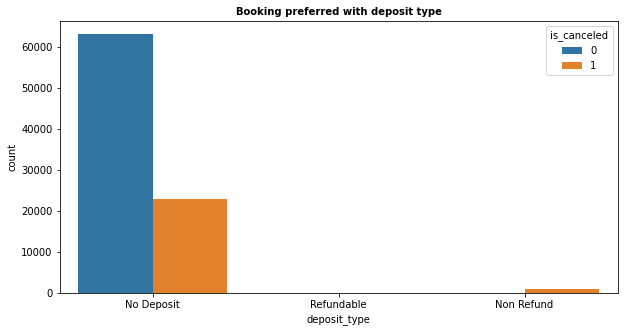

In [155]:
plt.figure(figsize = (10,5))
sns.countplot(x='deposit_type',data=Hotel_df,hue ='is_canceled')               #plotting the value of deposit type using bar graph
plt.title('Booking preferred with deposit type',fontweight ="bold",size =10)   #adding a title to chart

We observed Most Bookings are done with 'No deposit' and most cancellations are also in 'no deposit' bookings. It is a surprise to see cancellations with 'Non-refundable' bookings

Analysing rate of cancellation 

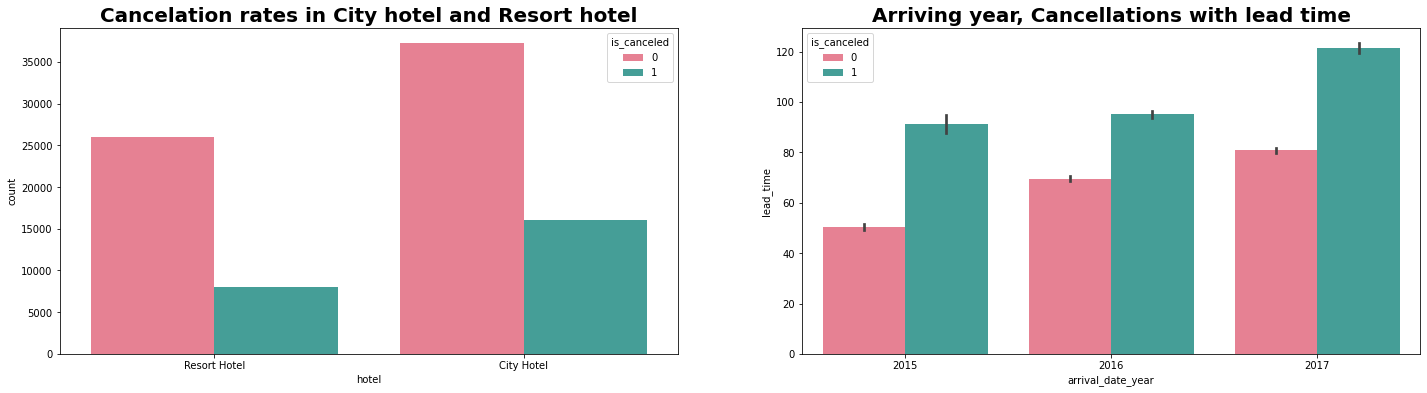

In [156]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1 )
sns.countplot(x='hotel',hue="is_canceled", data=Hotel_df,palette='husl')            #plotting the values using bar graph
plt.title("Cancelation rates in City hotel and Resort hotel",fontweight="bold", size=20)  #Adding title to chart
plt.subplot(1,2,2 )
sns.barplot(x='arrival_date_year', y='lead_time',hue='is_canceled', data= Hotel_df,  palette='husl')    #plotting the values using bar graph
plt.title('Arriving year, Cancellations with lead time',fontweight="bold", size=20)                       #Adding the title to chart
plt.subplots_adjust(right=1.7)

Cancelation rate is higher in city hotel. With more lead time there is more possibility of booking cancellation. 

# Waiting time





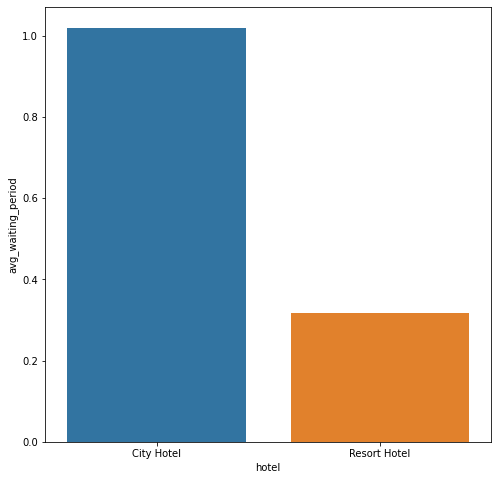

In [157]:
grouped_by_hotel = Hotel_df.groupby('hotel') #creating a DF which store groupby 'Hotel' column
# waiting_df which stores mean of days in waiting list column
Waiting_df = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize = (8,8))
sns.barplot(x = Waiting_df['hotel'], y = Waiting_df['avg_waiting_period'] )
plt.show()

We observe City hotel has significantly longer waiting time, hence City Hotel is much busier than Resort Hotel.

# Average_daily_rate month wise

Text(0.5, 1.0, 'Average daily rate month wise')

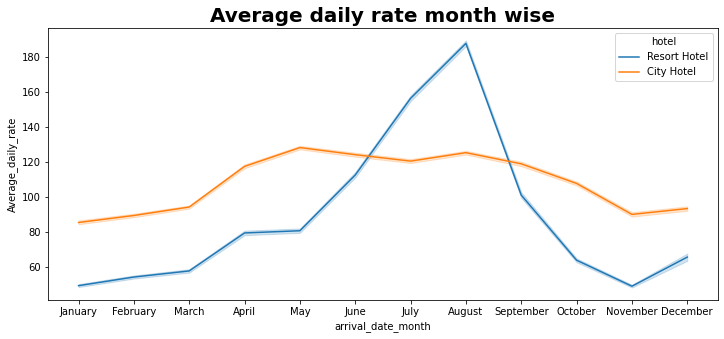

In [158]:
plt.figure(figsize=(12,5))
sns.lineplot(data = Hotel_df, x = 'arrival_date_month', y = 'Average_daily_rate', hue = 'hotel',sort =True)
plt.title('Average daily rate month wise',fontweight ='bold',size =20)                                      #Adding the title to chart

For resort hotels, the average daily rate is more expensive during august, july and september.

For city hotels, the average daily rate is more expensive during august, july, june and may.

# Average_daily_price per person

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


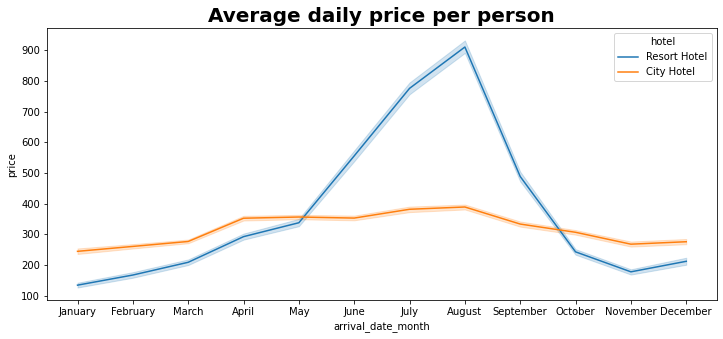

In [159]:
plt.figure(figsize=(12,5))
# Calculating average daily rate per person
Hotel_df['Average_Daily_rate_pp'] = Hotel_df['Average_daily_rate'] / (Hotel_df['adults'] + Hotel_df['children']) 
Actual_guests = Hotel_df.loc[Hotel_df["is_canceled"] == 0]
Actual_guests['price'] = Actual_guests['Average_daily_rate'] * (Actual_guests['Full_stay'])
sns.lineplot(data = Actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel')
plt.title('Average daily price per person',fontweight ='bold', size =20)
plt.show()

We observed after 2 days Average_daily_rate for both the hotels is in range 100 to 130. To get min. Average_daily_rate for resort hotel you should plan a stay of 6-7 days. For city hotels is almost constant.

# Special requests offered by hotel

In [160]:
Hotel_df['total_of_special_requests'].value_counts()  #Counting the number of special requests made by guests

0    43788
1    28976
2    11795
3     2314
4      320
5       36
Name: total_of_special_requests, dtype: int64

Text(0.5, 0, 'No. of special requests')

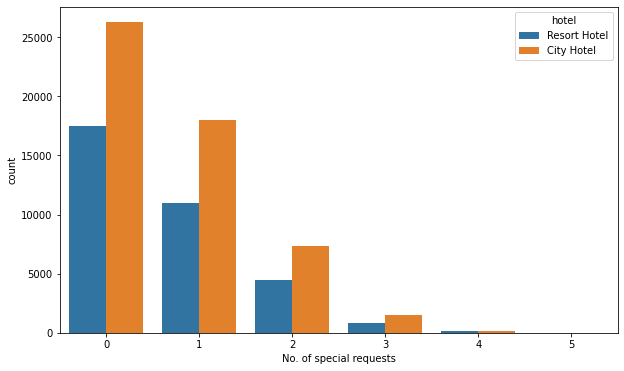

In [161]:
plt.figure(figsize =(10,6))
sns.countplot(data =Hotel_df,x ='total_of_special_requests', hue ='hotel')
plt.xlabel('No. of special requests')

We observe that City hotel has entertain maximum number of special requests.

# Conclusion


The majority of guests come from western europe countries.We should spend a significant amount of our budget on those area.

Around 61% bookings are for City hotel and 39% bookings are for Resort hotel, therefore City Hotel is busier than Resort hotel.

Majority of the hotels booked are city hotel. Definitely need to spend the most targeting fund on those hotel.

We should also target months between May to Aug. Those are peak months due to the summer period.

Given that we do not have repeated guests, we should target our advertisement section and also should change the holiday packages offered to guests toin order increase returning guests.

80% distribution_channel is TA/TO

Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.

November,December, Januaryand February are the months which has less booking so in this perios you can get rooms with less average daily rate. And Avoid most busiest months for hotels (May,June,July,August)